In [1]:
import os
os.getcwd()

'/home/elton/Downloads/contr-use-among-adol'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('uncoded_w_header.csv')
# df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,ID,age,sex,religion,other3,ethnicity,other4,education,maritalstatus,other6,...,FC7,FC7a,FC7b,FC7c,FC7d,FC7e,FC7f,FC7g,FC8,FC9
0,1,18.0,female,christianity,NaN,akan,NaN,secondary,single,NaN,...,NaN,yes,no,no,no,no,no,no,yes,NaN
1,2,17.0,male,islam,NaN,akan,NaN,secondary,single,NaN,...,NaN,no,yes,no,no,no,no,no,yes,NaN
2,3,17.0,female,christianity,NaN,akan,NaN,secondary,single,NaN,...,NaN,no,yes,yes,no,no,no,yes,no,Because your partner will be held responsible ...
3,4,20.0,female,christianity,NaN,ga,NaN,secondary,dating,NaN,...,NaN,no,no,no,yes,no,no,no,NaN,NaN
4,5,18.0,female,christianity,NaN,ga,NaN,secondary,dating,NaN,...,NaN,no,no,no,yes,no,no,no,NaN,NaN


In [4]:
section_a = df[["age", "sex", "religion", "other3", "ethnicity", "other4", "education", "maritalstatus", "other6", "MS1", "guardian", "other7", "KC1", "KC2"]]
section_a.head()

,age,sex,religion,other3,ethnicity,other4,education,maritalstatus,other6,MS1,guardian,other7,KC1,KC2
0,18.0,female,christianity,NaN,akan,NaN,secondary,single,NaN,NaN,mother,NaN,yes,NaN
1,17.0,male,islam,NaN,akan,NaN,secondary,single,NaN,NaN,mother,NaN,yes,NaN
2,17.0,female,christianity,NaN,akan,NaN,secondary,single,NaN,NaN,uncle‎/auntie,NaN,yes,NaN
3,20.0,female,christianity,NaN,ga,NaN,secondary,dating,NaN,secondary,mother,NaN,yes,NaN
4,18.0,female,christianity,NaN,ga,NaN,secondary,dating,NaN,tertiary,mother,NaN,yes,NaN


<h1>Data Preprocessing</h1>

<p>There were some missing values in the data so this is how it was treated:</p>

<ul>
    <li>For the missing ages I filled it in with the mean ages</li>
    <li>There was one missing value for the educational level of the married/dating so I filled it in with the mode of the educational level of married/singles which was Secondary</li>
</ul>

In [5]:
section_a.shape

(200, 14)

<h3>Descriptive Statistics</h3>

In [6]:
section_a.describe(include='all')

,age,sex,religion,other3,ethnicity,other4,education,maritalstatus,other6,MS1,guardian,other7,KC1,KC2
count,178.000000,200,200,1.0,188,13,200,200,0.0,70,180,20,200,0.0
unique,NaN,2,3,NaN,6,11,1,3,NaN,5,3,3,2,NaN
top,NaN,male,christianity,NaN,akan,hausa,secondary,single,NaN,secondary,mother,both parents,yes,NaN
freq,NaN,121,181,NaN,162,3,200,129,NaN,48,103,18,198,NaN
mean,17.353933,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.627278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,17.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>More Data Wrangling</h3>

In [7]:
# Dropped other religion column since it has no vals
section_a = section_a.drop('other3', axis=1)

In [8]:
section_a.isnull().sum(axis=0)

age               22
sex                0
religion           0
ethnicity         12
other4           187
education          0
maritalstatus      0
other6           200
MS1              130
guardian          20
other7           180
KC1                0
KC2              200
dtype: int64

In [9]:
# filling in other ethnicity into ethnicity col
for i in range(0,section_a.shape[0]):
    if section_a['ethnicity'].isnull()[i]:
        section_a['ethnicity'][i] = section_a['other4'][i]

In [10]:
# removing other ethnicity column and other marital status
section_a = section_a.drop('other4', axis=1)
section_a = section_a.drop('other6', axis=1)

In [11]:
section_a.isnull().sum(axis=0)

age               22
sex                0
religion           0
ethnicity          0
education          0
maritalstatus      0
MS1              130
guardian          20
other7           180
KC1                0
KC2              200
dtype: int64

In [12]:
# filling in guardian with other guardian
for i in range(0,section_a.shape[0]):
    if section_a['guardian'].isnull()[i]:
        section_a['guardian'][i] = section_a['other7'][i]

In [13]:
section_a = section_a.drop('other7', axis=1)

In [14]:
section_a.describe(include='all')

,age,sex,religion,ethnicity,education,maritalstatus,MS1,guardian,KC1,KC2
count,178.000000,200,200,200,200,200,70,200,200,0.0
unique,NaN,2,3,16,1,3,5,6,2,NaN
top,NaN,male,christianity,akan,secondary,single,secondary,mother,yes,NaN
freq,NaN,121,181,162,200,129,48,103,198,NaN
mean,17.353933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.627278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Checking for Null Values</h3>

In [15]:
section_a.isnull().sum(axis=0)

age               22
sex                0
religion           0
ethnicity          0
education          0
maritalstatus      0
MS1              130
guardian           0
KC1                0
KC2              200
dtype: int64

In [16]:
# dropping occupation of guardians since empty
section_a = section_a.drop('KC2', axis=1)

In [17]:
section_a.isnull().sum(axis=0)

age               22
sex                0
religion           0
ethnicity          0
education          0
maritalstatus      0
MS1              130
guardian           0
KC1                0
dtype: int64

In [18]:
# fill in blank age with mean age
avg_age = section_a.mean(axis=0).round()
for  i in range(0,section_a.shape[0]):
    if section_a['age'].isnull()[i]:
        section_a['age'][i] = avg_age

In [19]:
section_a.isnull().sum(axis=0)

age                0
sex                0
religion           0
ethnicity          0
education          0
maritalstatus      0
MS1              130
guardian           0
KC1                0
dtype: int64

<h1>Age</h1>

In [20]:
# Senam, I filled in the place that had 2 as the age with 20
for i in range(0, section_a.shape[0]):
    if section_a['age'][i] == 2:
        section_a['age'][i] = avg_age

In [21]:
section_a.describe(include='all')

,age,sex,religion,ethnicity,education,maritalstatus,MS1,guardian,KC1
count,200.000000,200,200,200,200,200,70,200,200
unique,NaN,2,3,16,1,3,5,6,2
top,NaN,male,christianity,akan,secondary,single,secondary,mother,yes
freq,NaN,121,181,162,200,129,48,103,198
mean,17.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.088035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Mean of Ages</h3>

In [22]:
print("The mean age is {}".format(section_a.mean(axis=0).round()))

The mean age is age    17.0
dtype: float64


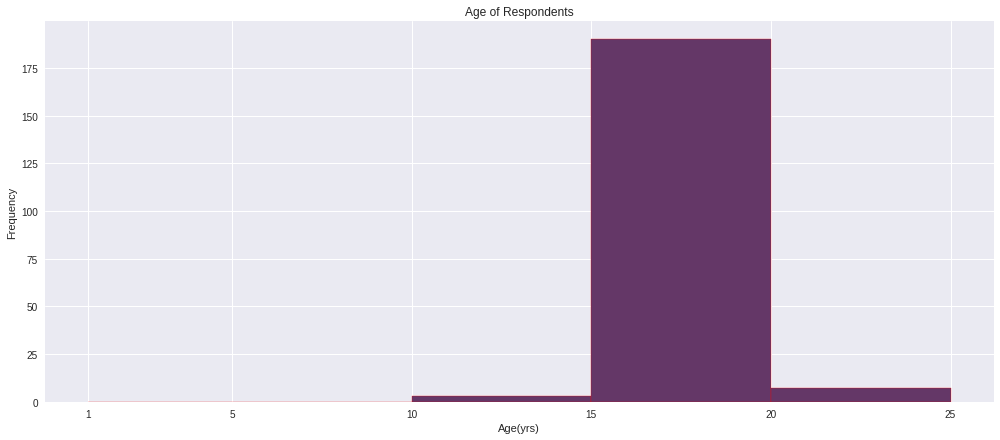

In [23]:
# Histogram of ages
y = [1,5,10,15,20,25]
plt.figure(figsize=[17,7])
plt.style.use("seaborn")
plt.hist(section_a.age,y, ec="red",color="#643767")
plt.xlabel("Age(yrs)")
plt.ylabel("Frequency")
plt.title("Age of Respondents")
plt.xticks(y)

plt.show()

<h1>Sex</h1>

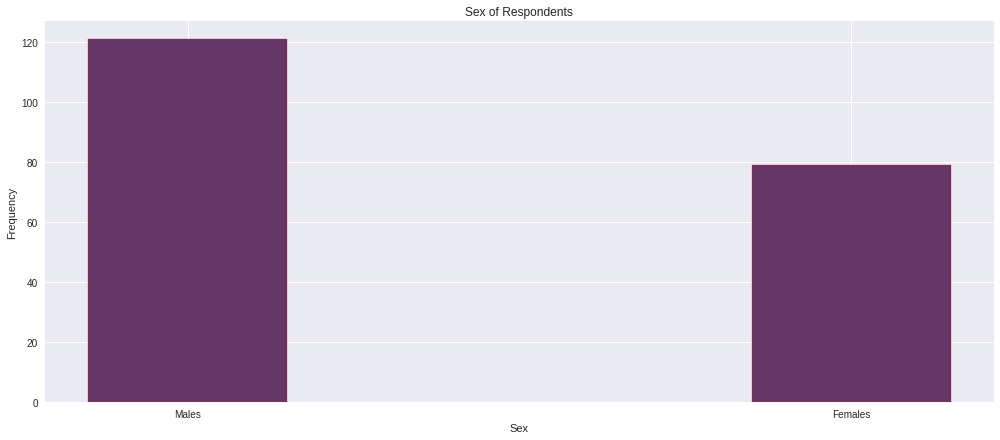

In [24]:
# Histogram of sex
plt.figure(figsize=[17,7])
plt.bar(["Males","Females"],[121,79], width=.3, ec="red", color="#643767")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Sex of Respondents")

plt.show()

In [25]:
# value counts of sex
section_a.sex.value_counts()

male      121
female     79
Name: sex, dtype: int64

<h3>Percentages of Sex</h3>


In [26]:
male = (121/200)*100
female = (79/200)*100
print("Males: {}%\n".format(male))
print("Females: {}%".format(female))

Males: 60.5%

Females: 39.5%


<h1>Religion</h1>

In [27]:
section_a.religion.value_counts()

christianity    181
islam            18
traditional       1
Name: religion, dtype: int64

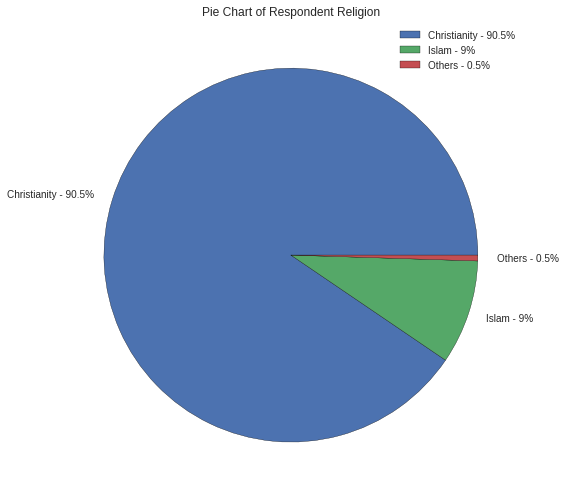

In [28]:
# plt.style.use("fivethirtyeight")
slices = [181,18,1]
labels = ["Christianity - 90.5%", "Islam - 9%", "Others - 0.5%"]
plt.figure(figsize=[20,7])
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'})
plt.title('Pie Chart of Respondent Religion')
plt.tight_layout()
plt.legend()
plt.show()

In [29]:
# Percentages of Ethnicity
section_a.ethnicity.unique()

array(['akan', 'ga', 'ewe', 'Grusi', 'Krobo', 'dagomba', 'frafra',
       'gonja', 'kasaase', 'alaata', 'hausa', 'kokomba', 'sisala',
       'fulani', 'Kassina', 'krobo'], dtype=object)

In [30]:
ethnic = pd.DataFrame(section_a.ethnicity.value_counts())
ethnic.reset_index(inplace=True)
header = ["ethnicity","frequency"]
ethnic.columns = header

In [31]:
for i in range(0,ethnic.shape[0]):
    percentage = (ethnic.frequency[i]/section_a.shape[0])*100
    ethnicity = ethnic.ethnicity[i]
    print("Ethnicity: {} ----- Percentage: {}% \n".format(ethnicity,percentage))
print("--------------------------------------------")
print("Others: {}%".format((0.015+0.005*9)*100))

Ethnicity: akan ----- Percentage: 81.0% 

Ethnicity: ewe ----- Percentage: 5.5% 

Ethnicity: dagomba ----- Percentage: 2.5% 

Ethnicity: ga ----- Percentage: 2.5% 

Ethnicity: hausa ----- Percentage: 1.5% 

Ethnicity: frafra ----- Percentage: 1.5% 

Ethnicity: gonja ----- Percentage: 1.0% 

Ethnicity: kasaase ----- Percentage: 0.5% 

Ethnicity: Kassina ----- Percentage: 0.5% 

Ethnicity: kokomba ----- Percentage: 0.5% 

Ethnicity: Krobo ----- Percentage: 0.5% 

Ethnicity: fulani ----- Percentage: 0.5% 

Ethnicity: alaata ----- Percentage: 0.5% 

Ethnicity: sisala ----- Percentage: 0.5% 

Ethnicity: krobo ----- Percentage: 0.5% 

Ethnicity: Grusi ----- Percentage: 0.5% 

--------------------------------------------
Others: 6.0%


<h1>Education</h1>

In [32]:
# checking unique values
section_a.education.unique()

array(['secondary'], dtype=object)

<h3>The population in this study were all high school students</h3>

<h1>Marital Status</h1>

In [33]:
# checking unique values
section_a.maritalstatus.unique()

array(['single', 'dating', 'married'], dtype=object)

In [34]:
section_a.maritalstatus.value_counts()

single     129
dating      70
married      1
Name: maritalstatus, dtype: int64

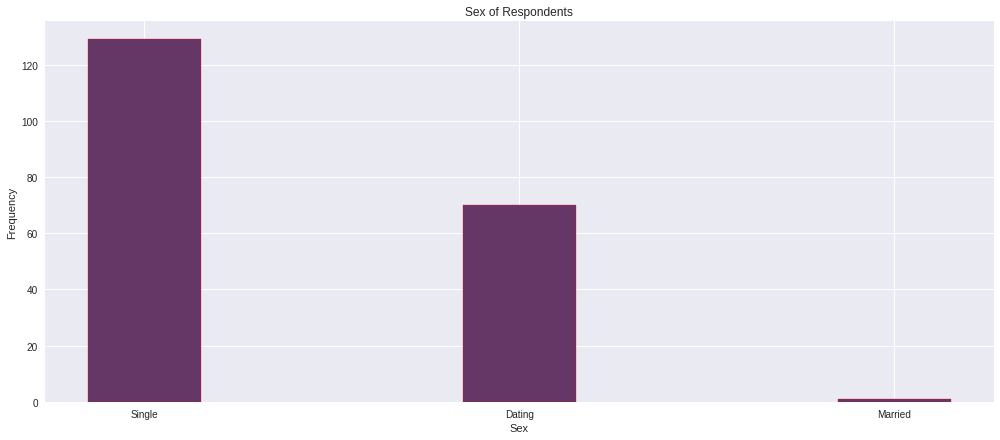

In [35]:
plt.figure(figsize=[17,7])
plt.bar(["Single","Dating","Married"], [129, 70, 1], ec="red", width=.3,color="#643767")

plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.title("Sex of Respondents")

plt.show()

<h5> Percentages of Marital Status</h5>

In [36]:
single = 129/200
dating = 70/200
married = 1/200

print("Single:{}%, Married: {}%, Dating: {}%".format(single*100,married*100, dating*100))

Single:64.5%, Married: 0.5%, Dating: 35.0%


In [37]:
section_a.describe(include='all')

,age,sex,religion,ethnicity,education,maritalstatus,MS1,guardian,KC1
count,200.000000,200,200,200,200,200,70,200,200
unique,NaN,2,3,16,1,3,5,6,2
top,NaN,male,christianity,akan,secondary,single,secondary,mother,yes
freq,NaN,121,181,162,200,129,48,103,198
mean,17.390000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.088035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Education of Partner if married or Dating</h1>

In [38]:
# extracting married or dating for partner edu. level
partner_education = section_a[["maritalstatus", "MS1"]][section_a.maritalstatus != 'single']
partner_education.head()

,maritalstatus,MS1
3,dating,secondary
4,dating,tertiary
5,dating,tertiary
8,dating,tertiary
9,dating,tertiary


In [39]:
partner_education.MS1.unique()

array(['secondary', 'tertiary', 'vocational', nan, 'no formal education',
       'primary'], dtype=object)

In [40]:
partner_education.MS1.value_counts()

secondary              48
tertiary               19
no formal education     1
primary                 1
vocational              1
Name: MS1, dtype: int64

In [41]:
# filling in 1 blank with the most common educational level
partner_education['MS1'].replace(np.nan,"secondary", inplace=True)

In [42]:
partner_education.MS1.value_counts()

secondary              49
tertiary               19
no formal education     1
primary                 1
vocational              1
Name: MS1, dtype: int64

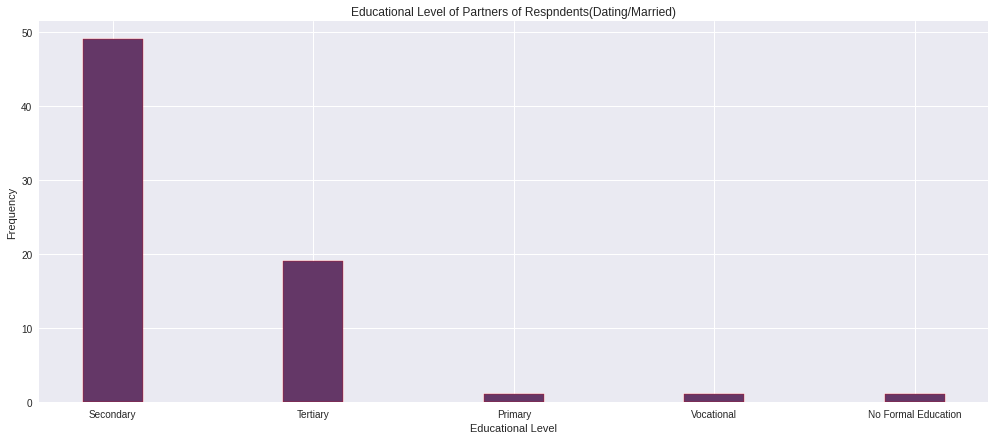

In [43]:
# bar chart of educational level
plt.figure(figsize=[17,7])
plt.bar(["Secondary","Tertiary","Primary","Vocational","No Formal Education"],[49,19,1,1,1], width=.3, ec="red", color="#643767")

plt.xlabel('Educational Level')
plt.ylabel('Frequency')
plt.title("Educational Level of Partners of Respndents(Dating/Married)")

# plt.tight_layout()
plt.show()

<h1>Guardian Info</h1>

<p>Here the Other option includes:</p>
<ul>
    <li>Both parents</li>
    <li>Parents, uncles, aunties</li>
    <li>Sister</li>
</ul>

In [44]:
guardian = pd.DataFrame(section_a.guardian.value_counts())
guardian.reset_index(inplace=True)
header = ["guardian","frequency"]
guardian.columns = header
guardian

,guardian,frequency
0,mother,103
1,father,67
2,both parents,18
3,uncle‎/auntie,10
4,sister,1
5,"parents, uncles, aunties",1


<h3>Percentages for Guardian info</h3>

In [45]:
for i in range(0, guardian.shape[0]):
    percentage = guardian["frequency"][i]/guardian["frequency"].sum(axis=0)*100
    print("Guardian: {} ----------- Percentage: {}%\n".format(guardian["guardian"][i], percentage))

print("-------------------------------------------------------------------")
print("Other ----------- Precentage: {}%".format((.09+.005+.005)*100))

Guardian: mother ----------- Percentage: 51.5%

Guardian: father ----------- Percentage: 33.5%

Guardian: both parents ----------- Percentage: 9.0%

Guardian: uncle‎/auntie ----------- Percentage: 5.0%

Guardian: sister ----------- Percentage: 0.5%

Guardian: parents, uncles, aunties ----------- Percentage: 0.5%

-------------------------------------------------------------------
Other ----------- Precentage: 10.0%


<h3>Bar Graph with all entries</h3>

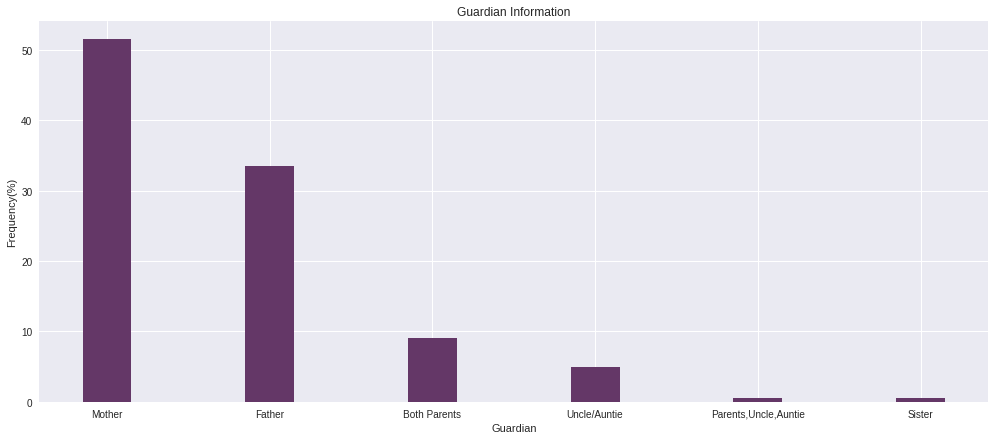

In [46]:
plt.figure(figsize=[17,7])

x = ["Mother","Father","Both Parents","Uncle/Auntie", "Parents,Uncle,Auntie","Sister"]
y = [51.5,33.5,9,5,.5,.5]
plt.bar(x,y, width=.3, color="#643767")

plt.xlabel("Guardian")
plt.ylabel("Frequency(%)")
plt.title("Guardian Information")

plt.show()

<h3>Bar Graph with both parents, parents uncle aunties, and sisters labelled as others</h3>

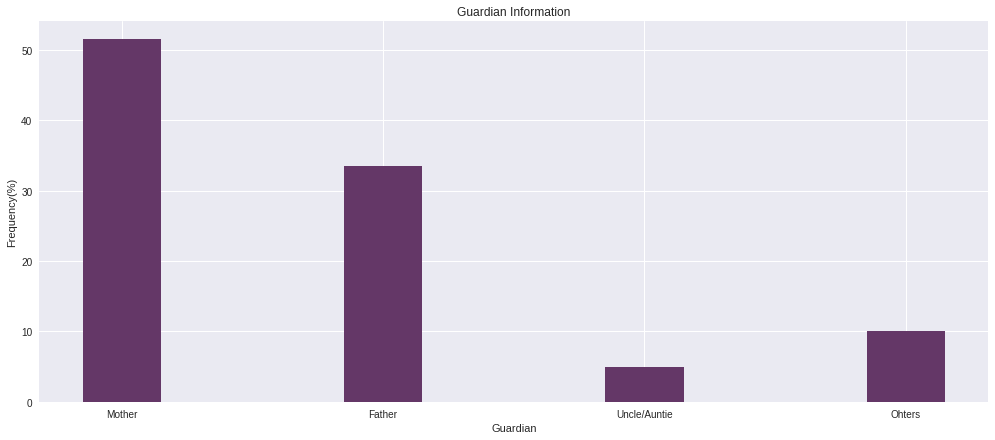

In [47]:
plt.figure(figsize=[17,7])

x = ["Mother","Father","Uncle/Auntie", "Ohters"]
y = [51.5,33.5,5,.5+.5+9]
plt.bar(x,y, width=.3, color="#643767")

plt.xlabel("Guardian")
plt.ylabel("Frequency(%)")
plt.title("Guardian Information")

plt.show()